<a href="https://colab.research.google.com/github/HuynhTriHenry/BT_AI/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)= cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


So nay la: [1]


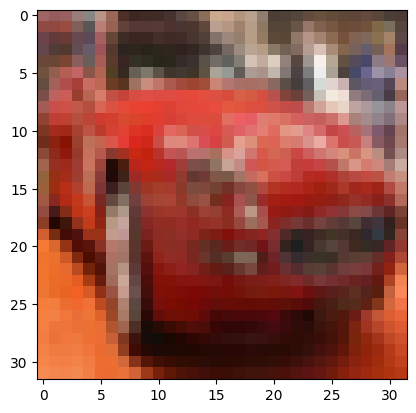

In [2]:
import matplotlib.pyplot as plt
hinh= x_train[5]   
plt.imshow(hinh,cmap=plt.cm.binary)
plt.show
print("So nay la:",y_train[5])

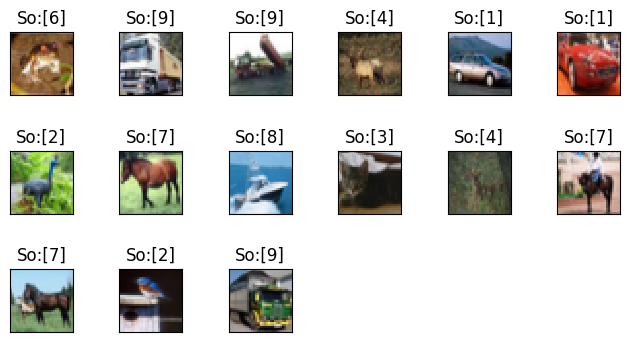

In [3]:
for i in range(15):
  plt.subplot(4,6,i+1) 
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title("So:{}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [4]:
from keras.models import Sequential
from keras.layers import Dense

model= Sequential()
model.add(Dense(512, input_shape = (32*32*3,), activation = 'relu'))
model.add(Dense(10,activation= 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


In [5]:
x_train = x_train.reshape((50000,32*32*3,))
x_train = x_train.astype('float32')/255
x_test = x_test.reshape((10000,32*32*3,))
x_test = x_test.astype('float32')/255

In [6]:
from keras.utils import to_categorical 

y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10)

In [7]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs = 300, batch_size= 128) # Mỗi lần học chỉ 128 dữ liệu, không học hết 60000 dữ liệu , học tổng cộng 10 lầnlần
test_loss, test_acc = model.evaluate(x_test,y_test)
print('test_accuracy:',test_acc)
print('test_loss:',test_loss)

Epoch 1/300
391/391 [==============================] - 16s 37ms/step - loss: 2.2012 - accuracy: 0.2650
Epoch 2/300
391/391 [==============================] - 13s 33ms/step - loss: 1.8005 - accuracy: 0.3579
Epoch 3/300
391/391 [==============================] - 13s 33ms/step - loss: 1.7139 - accuracy: 0.3878
Epoch 4/300
391/391 [==============================] - 13s 32ms/step - loss: 1.6565 - accuracy: 0.4135
Epoch 5/300
391/391 [==============================] - 13s 32ms/step - loss: 1.6235 - accuracy: 0.4276
Epoch 6/300
391/391 [==============================] - 12s 31ms/step - loss: 1.5887 - accuracy: 0.4398
Epoch 7/300
391/391 [==============================] - 13s 33ms/step - loss: 1.5616 - accuracy: 0.4492
Epoch 8/300
391/391 [==============================] - 12s 32ms/step - loss: 1.5373 - accuracy: 0.4565
Epoch 9/300
391/391 [==============================] - 14s 35ms/step - loss: 1.5184 - accuracy: 0.4636
Epoch 10/300
391/391 [==============================] - 14s 35ms/step - l

1/1 [==============================] - 0s 26ms/step


array([7])

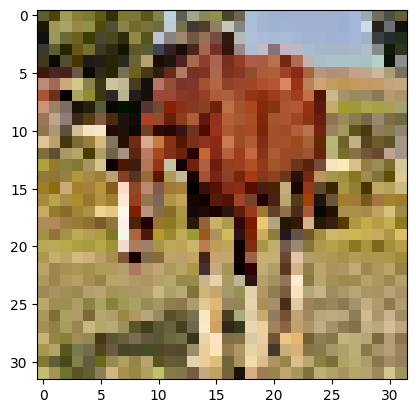

In [14]:
from keras.utils.image_utils import img_to_array 
from keras.utils import load_img 
import numpy as np
img = load_img('conngua1.jfif',target_size=(32,32))
plt.imshow(img)

img= img_to_array(img)

img =img.reshape(1,32*32*3)
img = img.astype('float32')
img = img /255
np.argmax(model.predict(img),axis=-1)


1/1 [==============================] - 0s 27ms/step


array([6])

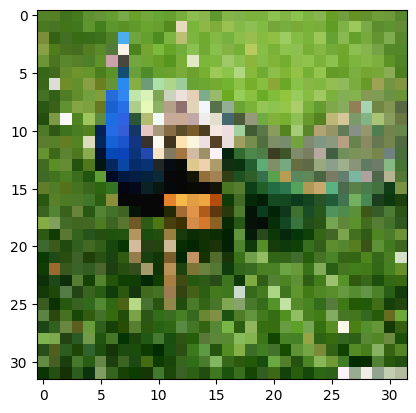

In [12]:
from keras.utils.image_utils import img_to_array 
from keras.utils import load_img 
import numpy as np
img = load_img('concong.jpg',target_size=(32,32))
plt.imshow(img)

img= img_to_array(img)

img =img.reshape(1,32*32*3)
img = img.astype('float32')
img = img /255
np.argmax(model.predict(img),axis=-1)